In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [20]:
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt

predicates = {'get': 'NAME,B25077_001E', 'for': 'state:06'}
HOST = 'https://api.census.gov/data'
dataset = 'acs/acs1'
col_names = ['name', 'median_home_value', 'state']
dfs = []

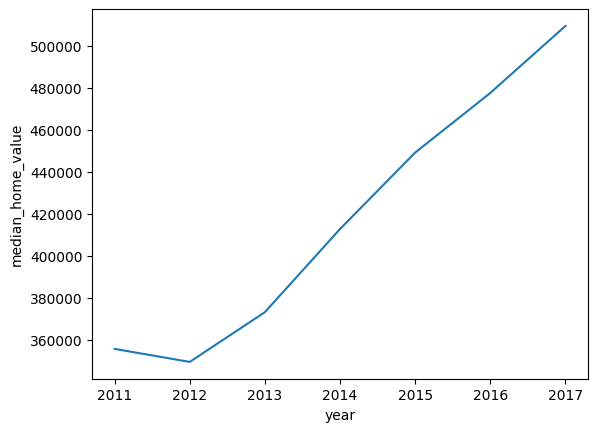

'\nWow! Housing prices have really shot up in California!\n'

In [21]:
# exercise 01

"""
Home Values in California

California's major cities have been in the news for skyrocketing housing prices. How has the median home value changed over the last several years? In this exercise you will use a loop to request variable B25077_001E from seven ACS years and plot the value over time.

The predicates dictionary has been created, and is printed to the console. Notice that state:06 sets the GEOID for California. pandas and seaborn have been imported using the usual aliases. HOST and dataset have been defined, and dfs is an empty list that has been initialized as a collector for the requested DataFrames.
"""

# Instructions

"""


    Construct a range object with integers from 2011 to 2017

    Create a column named "year", with its value set to the current value of the year variable

    Set the median_home_value column data type to int

    Create a lineplot of home values. Set the first parameter (x) to "year", set second parameter (y) to "median_home_value"

"""

# solution

# Loop over years 2011 to 2017
for year in range(2011,2018):
    base_url = "/".join([HOST, str(year), dataset])
    r = requests.get(base_url, params=predicates)
    df = pd.DataFrame(columns=col_names, data=r.json()[1:])    
    # Add column to df to hold year value, append df to collector dfs
    df['year'] = year
    dfs.append(df)

# Concatenate all DataFrames, fix column type
states = pd.concat(dfs, ignore_index=True)
states["median_home_value"] = states["median_home_value"].astype(int)

sns.lineplot(x="year", y="median_home_value", data = states)
plt.show()

#----------------------------------#

# Conclusion

"""
Wow! Housing prices have really shot up in California!
"""

In [24]:
states = pd.read_csv(path_data+'states_ch02.csv').drop(columns=['index'])
states.head()

,name,total,m,m_school,m_school_insured,m_school_uninsured,m_noschool,m_noschool_insured,m_noschool_uninsured,f,f_school,f_school_insured,f_school_uninsured,f_noschool,f_noschool_insured,f_noschool_uninsured,state,year
0,Alabama,473462,232585,85373,70314,15059,147212,94399,52813,240877,98604,82273,16331,142273,99226,43047,1,2013
1,Alaska,74441,39221,12448,9595,2853,26773,15450,11323,35220,11842,9300,2542,23378,16430,6948,2,2013
2,Arizona,638949,320956,118316,92695,25621,202640,117675,84965,317993,128117,102229,25888,189876,132004,57872,4,2013
3,Arkansas,278976,139572,52120,41117,11003,87452,51092,36360,139404,56489,46287,10202,82915,51077,31838,5,2013
4,California,3955658,2014088,888289,685581,202708,1125799,670639,455160,1941570,950134,736577,213557,991436,696650,294786,6,2013


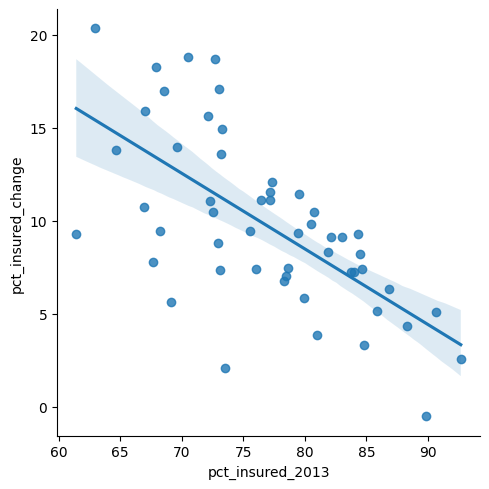

'\nGood work! As expected, states that started with lower rates of insurance among 19-25 year olds saw much bigger increases in insurance coverage.\n'

In [25]:
# exercise 02

"""
Health Insurance Coverage

The Affordable Care Act went into effect in 2014. One of its goals was to increase health insurance coverage among healthy young adults. Has health insurance coverage among 19-25 year olds changed with the passage of the Affordable Care Act? Let's calculate the percentage point change in coverage by state. Then plot the change against the initial percent covered rate.

ACS Table B27022 - "Health Insurance Coverage Status By Sex By Enrollment Status For Young Adults Aged 19 To 25" has been loaded. Columns names (printed to the console) indicate breakdowns by sex (m/f), school enrollment (school/noschool) and insurance (insured/uninsured).

As a reminder, we are using percentages throughout this course.

pandas and seaborn have been imported using the usual aliases.
"""

# Instructions

"""


    Calculate the percentage insured as 100 times the insured_total, divided by the total population

    Create a pivot table states_pvt with rows representing states (index = "state"), columns as years (columns = "year"), and values as "pct_insured"

    Calculate the change in percentage insured by subtracting pct_insured_2013 from pct_insured_2017

    Plot the change in insurance rate (y) against the rate in 2013 (x)

"""

# solution

# Calculate percent insured
states["insured_total"] = states["m_school_insured"] +  states["m_noschool_insured"] + states["f_school_insured"] + states["f_noschool_insured"]
states["pct_insured"] = 100 * (states["insured_total"] / states["total"])

# Pivot the table and rename the columns
states_pvt = states.pivot(index="state", columns="year", values="pct_insured")
states_pvt.columns = ["pct_insured_2013", "pct_insured_2017"]

# Calculate the change in insurance rates 2013 to 2017
states_pvt["pct_insured_change"] = states_pvt["pct_insured_2017"] - states_pvt["pct_insured_2013"]

# Plot the change against initial (2013) insurance rates
sns.lmplot(x = "pct_insured_2013", y = 'pct_insured_change', data = states_pvt)
plt.show()

#----------------------------------#

# Conclusion

"""
Good work! As expected, states that started with lower rates of insurance among 19-25 year olds saw much bigger increases in insurance coverage.
"""

In [26]:
base_url

'https://api.census.gov/data/2017/acs/acs1'

# Finding ACS Tables by Subject

The American Community Survey covers a large number of social and economic topics--too many to present at once. We will introduce many in this course, but you should also know where to find table and variable names. If you append /groups.html to the base URL for any Census data product, you will see a list of detailed tables available for that product.

You should be able to construct the base URL for the ACS 2017 1-year sample. Append /groups.html and go to that URL in your browser. Now use your browser's "Find in Page" feature to find the table title "MOVERS BETWEEN REGIONS IN THE UNITED STATES". What is the table name?

[Group_data](https://api.census.gov/data/2017/acs/acs1/groups.html)

### Possible Answers


    B07201
    
    
    B07201_001E
    
    
    B07101 {Answer}
    
    
    B07101PR
    
    
    B07011

In [28]:
philly = pd.read_csv(path_data+'philly.csv')
philly.head()


,median_home_value,median_home_value_moe,state,county,year
0,142000,4279,42,101,2011
1,142300,5229,42,101,2012
2,136800,4267,42,101,2013
3,148700,3778,42,101,2014
4,150700,3375,42,101,2015


   median_home_value  median_home_value_moe  state  county  year      rmoe
0             142000                   4279     42     101  2011  3.013380
1             142300                   5229     42     101  2012  3.674631
2             136800                   4267     42     101  2013  3.119152
3             148700                   3778     42     101  2014  2.540686
4             150700                   3375     42     101  2015  2.239549
5             154000                   3156     42     101  2016  2.049351
6             166200                   3549     42     101  2017  2.135379


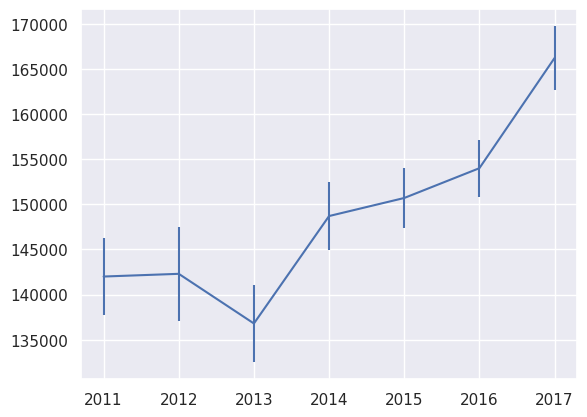

'\nNice looking chart! Notice that the Relative MOEs are very small—between 2% and 4%.\n'

In [29]:
# exercise 03

"""
Plotting Margins of Error over Time

In this exercise you will inspect changing home prices in Philadelphia, PA, using a line plot with error bars. The data come from ACS 1-year sample Table B25077. The estimates and margin of error for each year from 2011 to 2017 have been downloaded and concatenated into a pandas DataFrame named philly. ACS table variables for the estimate and margin of error have been renamed to median_home_value and median_home_value_moe, respectively. (See the DataFrame in the console.)

pandas has been imported as pd.
"""

# Instructions

"""

   
    Import matplotlib.pyplot using the alias plt
   
    Create column rmoe (to hold the median home value Relative MOE) as 100 times the margin of error column divided by the estimate column
   
    print the DataFrame to inspect the Relative MOE
   
    Create an error bar plot: set the first argument to "year"; set the second argument to the name of the median home value column; set parameter yerr to the median home value MOE column; finally, set the data argument to the philly DataFrame

"""

# solution

# Import graphics packages
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Calculate and inspect Relative Margin of Error
philly["rmoe"] = 100 * (philly["median_home_value_moe"] / philly["median_home_value"])
print(philly)

# Create line plot with error bars of 90% MOE
plt.errorbar("year", "median_home_value", yerr = "median_home_value_moe", data = philly)
plt.show()

#----------------------------------#

# Conclusion

"""
Nice looking chart! Notice that the Relative MOEs are very small—between 2% and 4%.
"""

In [32]:
import numpy as np

In [33]:
# exercise 04

"""
Significance of Difference of Estimates

A line plot with error bars gives you a rough idea of trends, but are the year-to-year differences statistically significant? In this exercise, you will determine significance of changing median home prices in Philadelphia. You will evaluate the differences from year to year between 2011 and 2017.

The formula for the two-sample Z-statistic is:
z = (x1-x2)/sqrt(SE_x1² + SE_x2²)

A DataFrame philly is available with columns median_home_value, median_home_value_moe, and year.

pandas is imported as pd, and the sqrt function has been imported from the numpy module.
"""

# Instructions

"""


    Set x1 to the current year median home value, and x2 to the median home value for the prior year (current year minus 1)

    Set se_x1 to the current year MOE of the median home value divided by Z_CRIT, and se_x2 to the same calculation for the prior year

    Use Python's ternary operator (result1 if condition else result2) to return the empty string if the absolute value of z is greater than Z_CRIT, and otherwise return "not "

"""

# solution

# Set the critical Z score for 90% confidence, prepare message
Z_CRIT = 1.645
msg = "Philadelphia median home values in {} were {}significantly different from {}."
for year in range(2012, 2018):
    # Assign current and prior year's median home value to variables
    x1 = int(philly[philly["year"] == year]["median_home_value"])
    x2 = int(philly[philly["year"] == year-1]["median_home_value"])
    
    # Calculate standard error as 90% MOE / critical Z score
    se_x1 = float(philly[philly["year"] == year]["median_home_value_moe"]/Z_CRIT)
    se_x2 = float(philly[philly["year"] == year-1]["median_home_value_moe"]/Z_CRIT)
    
    # Calculate two-sample z-statistic, output message if greater than critical Z score
    z = (x1 - x2) / np.sqrt(se_x1**2 + se_x2**2)
    print(msg.format(year, "" if abs(z) > Z_CRIT else "not ", year - 1))

#----------------------------------#

# Conclusion

"""
Good work. Some years housing prices didn't change much, and some years they did.
"""

Philadelphia median home values in 2012 were not significantly different from 2011.
Philadelphia median home values in 2013 were not significantly different from 2012.
Philadelphia median home values in 2014 were significantly different from 2013.
Philadelphia median home values in 2015 were not significantly different from 2014.
Philadelphia median home values in 2016 were not significantly different from 2015.
Philadelphia median home values in 2017 were significantly different from 2016.


/tmp/ipykernel_264964/237329592.py:36: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x1 = int(philly[philly["year"] == year]["median_home_value"])
/tmp/ipykernel_264964/237329592.py:37: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  x2 = int(philly[philly["year"] == year-1]["median_home_value"])
/tmp/ipykernel_264964/237329592.py:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  se_x1 = float(philly[philly["year"] == year]["median_home_value_moe"]/Z_CRIT)
/tmp/ipykernel_264964/237329592.py:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  se_x2 = float(philly[philly["year"] == year-1]["median_home_value_mo

"\nGood work. Some years housing prices didn't change much, and some years they did.\n"

In [34]:
dc = pd.read_csv(path_data+'dc.csv')
dc

,total_est,total_moe,bike_est,bike_moe,state,year
0,306801,5723,9669,1400,11,2011
1,326143,6312,13493,2422,11,2012
2,330087,4834,14986,2071,11,2013
3,343062,5802,13330,1709,11,2014
4,358150,4914,14718,1816,11,2015
5,362204,5623,16647,1823,11,2016
6,375380,6102,18624,2587,11,2017


In [36]:
from numpy import sqrt

In [37]:
# exercise 05

"""
Significance of Difference of Proportions

Bike commuting is still uncommon, but Washington, DC, has a decent share. It has increased by over 1 percentage point in the last few years, but is this a statistically significant increase? In this exercise you will calculate the standard error of a proportion, then a two-sample Z-statistic of the proportions.

The formula for the standard error (SE) of a proportion is:

SE_p = 1/N * sqrt(SE_n² - P² * SE_N²)

The formula for the two-sample Z-statistic is:
z = (x1-x2)/sqrt(SE_x1² + SE_x2²)

The DataFrame dc is loaded. It has columns (shown in the console) with estimates (ending "_est") and margins of error (ending "_moe") for total workers and bike commuters.

The sqrt function has been imported from the numpy module.
"""

# Instructions

"""
Calculate bike_share by dividing the number of bikers by the total number of workers

Calculate the SE of the estimate of bikers and total workers, by dividing the MOE by Z_CRIT

Calculate the SE of the proportions: se_bike is the SE of the subpopulation SE_n, bike_share is the proportion P, and se_total is the SE of the population SE_N

Calculate Z:x_1 and x_2 are the bike_share in 2017 and 2011; SE_x_1 and SE_x_2 are se_p in 2017 and 2011
"""

# solution

# Set the critical Z score for 90% confidence
Z_CRIT = 1.645

# Calculate share of bike commuting
dc["bike_share"] = dc['bike_est'] / dc['total_est']

# Calculate standard errors of the estimate from MOEs
dc["se_bike"] = dc['bike_moe']/Z_CRIT
dc["se_total"] = dc['total_moe']/Z_CRIT
dc["se_p"] = sqrt(dc['se_bike']**2 - dc['bike_share']**2 * dc['se_total']**2)**0.5 / dc["total_est"]

# Calculate the two sample statistic between 2011 and 2017
Z = (dc[dc["year"] == 2017]["bike_share"] - dc[dc["year"] == 2011]["bike_share"]) / \
    sqrt(dc[dc["year"] == 2017]["se_p"]**2 + dc[dc["year"] == 2017]["se_p"]**2)
print(Z_CRIT < Z)

#----------------------------------#

# Conclusion

"""
Great! Even though it's from a small base, you can see that DC has experienced statistically significant growth in the share of workers commuting by bicycle.
"""

0    False
6    False
dtype: bool


"\nGreat! Even though it's from a small base, you can see that DC has experienced statistically significant growth in the share of workers commuting by bicycle.\n"

Index(['state', 'postal', 'name', 'total', 'internet', 'dial_up', 'broadband',
       'satellite', 'other_service', 'internet_without_subscription',
       'no_internet', 'label_x', 'label_y', 'geometry'],
      dtype='object')


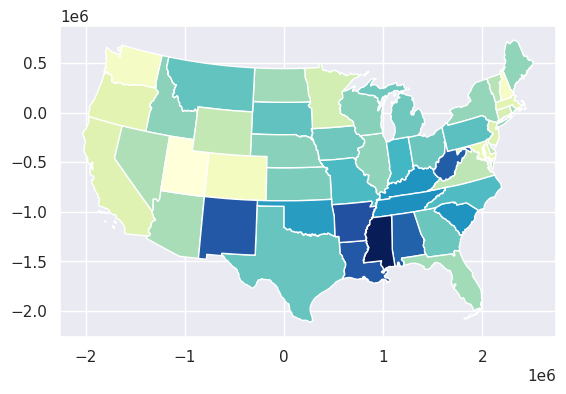

'\nNice map! There seems to be a concentration of households with no internet access in Appalachia and the Deep South.\n'

In [41]:
# exercise 06

"""
Choropleth Map of Internet Access

In this exercise you will load a geospatial data file and create a simple choropleth map. The data come from ACS Table B28011 - "Internet Subscriptions in Household", and include columns representing total households, those with internet and no_internet access, and various kinds of internet connectivity.

Remember that choropleth maps should show rates or proportions, not counts. After loading the data, you will calculate the percentage of households with no internet access, using columns no_internet and total households.
"""

# Instructions

"""
Choropleth Map of Internet Access

In this exercise you will load a geospatial data file and create a simple choropleth map. The data come from ACS Table B28011 - "Internet Subscriptions in Household", and include columns representing total households, those with internet and no_internet access, and various kinds of internet connectivity.

Remember that choropleth maps should show rates or proportions, not counts. After loading the data, you will calculate the percentage of households with no internet access, using columns no_internet and total households.
"""

# solution

# Import geopandas
import geopandas as gpd

# Load geospatial data
geo_state = gpd.read_file(path_data+'states_internet.gpkg')

# View GeoDataFrame columns
print(geo_state.columns)

# Calculate percent of households with no internet
geo_state["pct_no_internet"] = 100*(geo_state['no_internet'] / geo_state['total'])

# Create choropleth map using YlGnBu colormap
geo_state.plot(column='pct_no_internet', cmap='YlGnBu')
plt.show()

#----------------------------------#

# Conclusion

"""
Nice map! There seems to be a concentration of households with no internet access in Appalachia and the Deep South.
"""

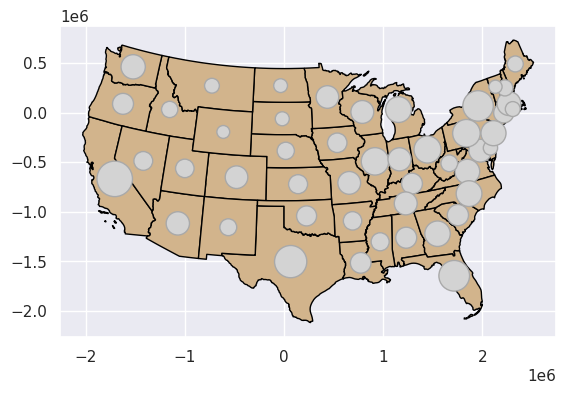

"\nGood work! Proportional symbol maps are a useful tool to have in your toolbelt. Now let's combine a proportional symbol map and a choropleth map.\n"

In [42]:
# exercise 07

"""
Proportional Symbol Map of Households w/ Internet

To map a raw count variable, you can use a proportional symbol map to create markers of sizes that are proportional to the data value being mapped. In this exercise you will find the centroid of each state, create a basemap of states, and place a circle at each centroid that is sized by the number of households with internet access.

The area of each marker should be proportional to the data value. Since marker sizes are provided as a diameter, you must take the square root of the column value. Marker sizes may look too big or too small. In this exercise, you will divide the marker size by 5--this is an aesthetic judgment call.

geopandas is imported using the usual alias, and the sqrt function has been imported from numpy.

The geo_state GeoDataFrame has been loaded.
"""

# Instructions

"""


    Call the centroid attribute on geo_state_pt and assign the result to the geometry column

    Create a basemap of state borders by calling the plot method on geo_state; set the color to "tan" and the edgecolor to "black"

    Create variable ms (to be passed to the markersize parameter) to the square root of the value of the geo_state_pt["internet"] column divided by 5

"""

# solution

# Create point GeoDataFrame at centroid of states
geo_state_pt = geo_state.copy()
geo_state_pt["geometry"] = geo_state_pt.centroid

# Set basemap and create variable for markersize
basemap = geo_state.plot(color='tan', edgecolor='black')
ms = sqrt(geo_state_pt['internet'])/5

# Plot proportional symbols on top of basemap
geo_state_pt.plot(ax = basemap, markersize = ms, color = "lightgray", edgecolor = "darkgray")
plt.show()

#----------------------------------#

# Conclusion

"""
Good work! Proportional symbol maps are a useful tool to have in your toolbelt. Now let's combine a proportional symbol map and a choropleth map.
"""

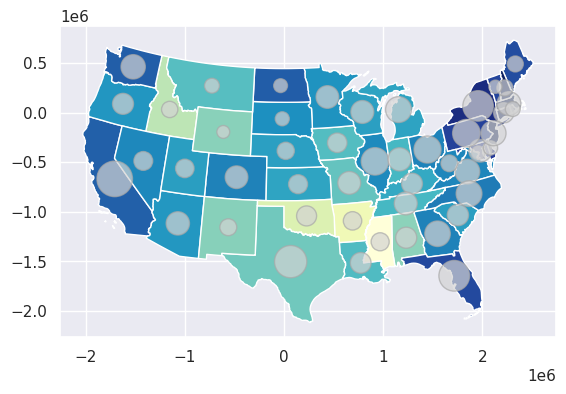

'\nGood work! These kind of bivariate maps are another way to explore relationships among variables. Does the percentage of broadband internet seem to be correlated with the total number of households with internet access? Do any states clearly buck this trend?\n'

In [43]:
# exercise 08

"""
Bivariate Map of Broadband Access

Sometimes we want to map two variables at once, a so-called bivariate map. One way to do this is by combining a choropleth map and a proportional symbol map. You will use the geo_state GeoDataFrame again to create a choropleth of the percentage of internet households with broadband access, and overaly a proportional symbol map of the count of households with internet access.

You will set an alpha transparency on the proportional symbol marker so as to not completely obscure the underlying choropleth.

geopandas is imported using the usual alias, and the sqrt function has been imported from numpy.

The geo_state GeoDataFrame has been loaded.
"""

# Instructions

"""


    Use the broadband and internet columns to calculate the percentage of internet households with broadband

    Create a choropleth basemap of the new pct_broadband column using a yellow-green-blue colormap

    Set the markersize of the centroid points to the square root of the number of households with internet access divided by 5; make the markers partially transparent by setting the alpha parameter to 0.7

"""

# solution

# Create point GeoDataFrame at centroid of states
geo_state_pt = geo_state.copy()
geo_state_pt["geometry"] = geo_state_pt.centroid

# Calculate percentage of internet households with broadband
geo_state["pct_broadband"] = 100*(geo_state['broadband'] / geo_state['internet'])

# Set choropleth basemap
basemap = geo_state.plot(column='pct_broadband', cmap='YlGnBu')

# Plot transparent proportional symbols on top of basemap
geo_state_pt.plot(ax = basemap, markersize=sqrt(geo_state_pt['internet'])/5, color = "lightgray", edgecolor = "darkgray", alpha=0.7)
plt.show()

#----------------------------------#

# Conclusion

"""
Good work! These kind of bivariate maps are another way to explore relationships among variables. Does the percentage of broadband internet seem to be correlated with the total number of households with internet access? Do any states clearly buck this trend?
"""

In [52]:
bk_2000 = pd.read_csv(path_data+'bk_2000.csv').drop(columns=['index'])
bk_2000.head()

,state,county,tract,geometry,mhi,mhi_msa,median_value,median_value_msa,pct_recent_build,pct_recent_build_msa,pct_ba,pct_ba_msa
0,36,47,51200,MULTIPOLYGON (((994216.2898478177 174053.26779...,31393,50795,535700,203100,2.927450,15.595939,11.550750,30.500175
1,36,47,51300,MULTIPOLYGON (((996457.9298599585 197995.79102...,30000,50795,221900,203100,10.153846,15.595939,16.188374,30.500175
2,36,47,51400,MULTIPOLYGON (((995928.0301860854 173957.84741...,32103,50795,278200,203100,2.212223,15.595939,16.514161,30.500175
3,36,47,51500,MULTIPOLYGON (((998421.4540602234 202066.79401...,36107,50795,258800,203100,4.025424,15.595939,18.810289,30.500175
4,36,47,51600,MULTIPOLYGON (((996940.7992289109 172126.51763...,25148,50795,169800,203100,2.486016,15.595939,8.033749,30.500175


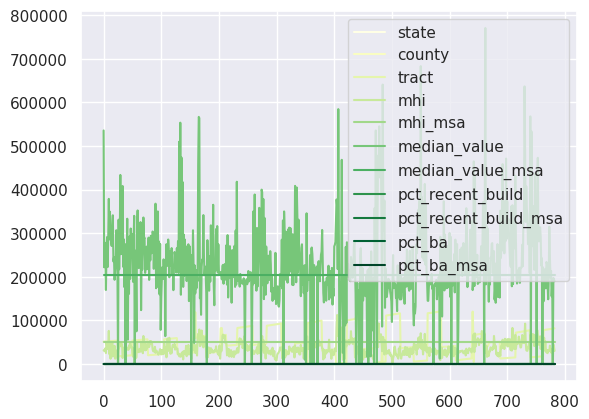

"\nGood work! We're starting to get a picture of processes of neighborhood change.\n"

In [45]:
# exercise 09

"""
Identifying Gentrifiable Tracts

In this exercise, you will identify and map the tracts that were gentrifiable in 2000. The criteria are:

    Low median household income (MHI), determined as tract MHI less than the MHI for the New York metro area.
    A low level of recent housing construction, determined as those tracts with a percentage of housing built in the previous 20 years (since 1980) less than the percentage for the New York metro area.

The GeoDataFrame bk_2000, with data for Brooklyn Census tracts in 2000, has been loaded for you.
"""

# Instructions

"""


    Calculate a boolean column low_mhi by checking to see whether mhi is less than mhi_msa

    Calculate a boolean column low_recent_build by checking to see whether the percentage of homes built in the 20 years prior to 2000 (pct_recent_build) is less than pct_recent_build_msa

    Use the & operator to classify the neighborhood as gentrifiable if both low_mhi and low_recent_build are true; the columns must be surrounded by parenthesis

    Map the gentrifiable tracts using the YlGn colormap


"""

# solution

# Median income below MSA median income
bk_2000["low_mhi"] = bk_2000['mhi'] < bk_2000['mhi_msa']

# Recent construction below MSA
bk_2000["low_recent_build"] = bk_2000['pct_recent_build'] < bk_2000['pct_recent_build_msa']

# Identify gentrifiable tracts
bk_2000["gentrifiable"] = (bk_2000['low_mhi']) & (bk_2000["low_recent_build"])

# Plot gentrifiable tracts
bk_2000.plot(column = 'gentrifiable', cmap = 'YlGn')
plt.show()

#----------------------------------#

# Conclusion

"""
Good work! We're starting to get a picture of processes of neighborhood change.
"""

In [11]:
# exercise 10

"""
Identifying Gentrifying Tracts

In this exercise, you will identify and map the tracts that were gentrifying between 2000 and 2010. To be classified as gentifying, tracts must have been gentrifiable in 2000 and meet these criteria:

    The percentage of the population with Bachelor's degrees or higher must be increasing faster than for the New York metro area.
    House values must have increased since 2000. In order to account for inflation, house values from 2000 will be multiplied by 1.2612.

The GeoDataFrame bk_2010 has been loaded for you. The column names are shown in the console. Because you will be comparing 2010 with 2000, it contains data from both years, in columns suffixed with "_2000" and "_2010". It also has the column gentrifiable that you created in the last exercise.
"""

# Instructions

"""

    Set increasing_education to True if the increase in the percentage of population with Bachelor's degrees from 2000 to 2010 is greater than the MSA-level increase
    Set increasing_house_value to True if the median_value_2010 is more than 1.2612 times greater than median_value_2000
    Using the & operator, set gentrifying to True if a tract is gentrifiable and has increasing_education and has increasing_house_value
    Map the gentrifying tracts using a "YlOrRd" colormap

"""

# solution

# Increase in percent BA greater than MSA
bk_2010["increasing_education"] = (bk_2010["pct_ba_2010"] - bk_2010["pct_ba_2000"]) > (bk_2010["pct_ba_msa_2010"] - bk_2010["pct_ba_msa_2000"])

# Increase in house value
bk_2010["increasing_house_value"] = bk_2010["median_value_2010"] > bk_2010["median_value_2000"] * 1.2612

# Identify gentryifying tracts
bk_2010["gentrifying"] = bk_2010["gentrifiable"] & bk_2010["increasing_education"] & bk_2010["increasing_house_value"]

# Plot gentrifying tracts
bk_2010.plot(column = "gentrifying", cmap = "YlOrRd")
plt.show()

#----------------------------------#

# Conclusion

"""
Excellent! Notice that the map has some gaps in it. This is because tracts change from decade to decade, usually splitting as population grows. The newly numbered tracts didn't match in those areas from 2000 to 2010. We will discuss this again later in the course.
"""

'\n\n'

In [12]:
# exercise 11

"""
Mapping Gentrification

Now that you have determined which tracts were gentrifiable in 2000 and which were gentrifying between 2000 and 2010, you will create a choropleth map. You will create a basemap of the Census tracts from 2000, and add layers of the gentrifiable and gentrifying tracts with custom-selected colors.
"""

# Instructions

"""


    Create a basemap of bk_2000 with a fill color of "white" and an edgecolor of "lightgray"

    Filter bk_2000 to plot only the gentrifiable tracts

    Now filter bk_2010 (Note the year) to plot only the gentrifying tracts using "red"

"""

# solution

# Create a basemap
basemap = bk_2000.plot(color='white', edgecolor='lightgray')

gentrifiable_tracts = bk_2000[bk_2000['gentrifiable']==True]
gentrifiable_tracts.plot(ax = basemap, color = "lightgray")

gentrifying_tracts = bk_2010[bk_2010['gentrifying']==True]
gentrifying_tracts.plot(ax = basemap, color = "red")

plt.show()

#----------------------------------#

# Conclusion

"""
Nice map! Maps can be powerful tools for communicating about complex processes such as gentrification. Although gentrification often gets written about in local media, in a study from 2014, Michael Barton showed that quantitative analyses like the one you just did show that gentrification affects many more neighborhoods than media reports indicate.
"""

'\n\n'